# MATH 210 Introduction to Mathematical Computing

## March 22, 2017

1. Solving systems of first order ODEs
    * Lnear systems
    * Nonlinear systems
2. Solving higher order equations
    * Vibration equations
3. Exercises

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import scipy.linalg as la
%matplotlib inline

## 1. Solving linear systems of first order ODEs

A system of first order ODEs is a system of equations involving unknown function $y_1$, $\dots$, $y_n$ and their derivatives

$$
\begin{align}
y_1' &= f_1(y_1,\dots,y_n,t) \\
& \vdots  \\
y_n' &= f_n(y_1,\dots,y_n,t)
\end{align}
$$

The dimension of the system is $n$, the number of unknown functions.

### Example

Consider the 2D linear system of equations

$$
\begin{align}
y_1' &= y_1 + y_2 \\
y_2' &= y_1 + 2y_2
\end{align}
$$

Let's use `odeint` to solve this system numerically given initial conditions $y_1(0) = y_2(0) = 1$ for $t \in [0,2]$.

In [2]:
# Vector function defining right side of the system of ODEs
def f(y,t):
    return [ y[0] + y[1] , y[0] + 2*y[1] ]

In [3]:
# Initial conditions
y0 = [1,1]

In [4]:
# Array of t values
t = np.linspace(0,2,100)

In [5]:
# Solve the system
Y = spi.odeint(f,y0,t)

In [6]:
# First column of Y is y(t) and second column is y'(t)
Y.shape

(100, 2)

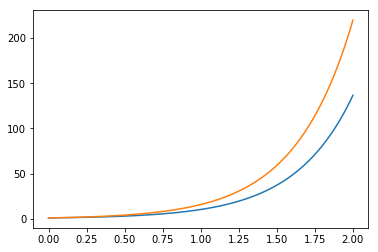

In [7]:
y1 = Y[:,0]
y2 = Y[:,1]
plt.plot(t,y1,t,y2);

Let's solve this system explicitly using eigenvalues $\lambda_1$, $\lambda_2$ and eigenvectors $\mathbf{v}_1$, $\mathbf{v}_2$ of the coefficient matrix $A = \begin{bmatrix} 1 & 1 \\ 1 & 2\end{bmatrix}$

$$
\mathbf{y}(t) = C_1 e^{\lambda_1 t} \mathbf{v}_1 + C_2 e^{\lambda_2 t} \mathbf{v}_2 \ , \ \ \mathbf{y}(0) = [1,1]^T
$$

In [8]:
# Compute the eigenvalues and eigenvectors of the coefficient matrix A
A = np.array([[1,1],[1,2]])
evals, evecs = la.eig(A)

In [9]:
evals

array([ 0.38196601+0.j,  2.61803399+0.j])

The eigenvalues are reals and so we can convert `evals` to real NumPy float datatypes:

In [10]:
evals = evals.real

In [11]:
# Solve for the constants C_1 and C_2 using initial conditions
y0 = np.array([[1],[1]])
C = la.solve(evecs,y0)

In [12]:
t = np.linspace(0,2,100)

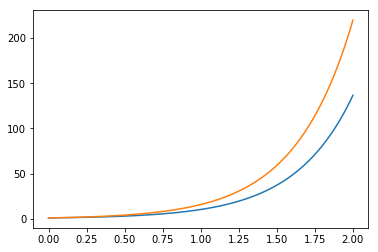

In [13]:
y1_true = C[0]*np.exp(evals[0]*t)*evecs[0,0] + C[1]*np.exp(evals[1]*t)*evecs[0,1]
y2_true = C[0]*np.exp(evals[0]*t)*evecs[1,0] + C[1]*np.exp(evals[1]*t)*evecs[1,1]
plt.plot(t,y1_true,t,y2_true);

### Example

Let's use `odeint` to numerically solve the nonlinear system

$$
\begin{align}
y_1' &= y_1^2 - y_2 \\
y_2' &= y_1 + y_2^2 \\
\end{align}
$$

We will plot the trajectory $(y_1(t),y_2(t))$ for $y_1(0) = -1/2$ and $y_2(0) = a$ for $a = 0,0.1,0.2,\dots,0.8$ and $t \in [0,10]$.

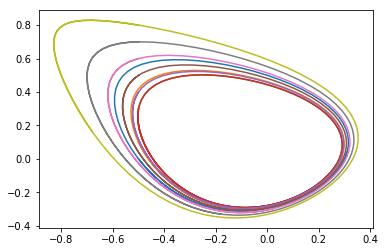

In [14]:
t = np.linspace(0,10,100)
def f(y,t):
    return [ y[0]**2 - y[1] , y[0] + y[1]**2 ]
for a in np.arange(0,0.9,0.1):
    Y = spi.odeint(f,[-1/2,a],t)
    plt.plot(Y[:,0],Y[:,1])

## 2. Solving higher order equations

Recall from last time, to solve a second order equation, we need to rewrite it as a first order system.

For example, $y'' + y = 0$ we introduce new variables $u_1 = y$ and $u_2 = y'$ and then write

$$
\begin{align}
u_1' &= u_2 \\
u_2' &= -u_1
\end{align}
$$

In [15]:
def f(u,t):
    return [ u[1] , -u[0] ]

In [16]:
u0 = [0,1]

In [17]:
t = np.linspace(0,2*np.pi,100)

In [18]:
U = spi.odeint(f,u0,t)

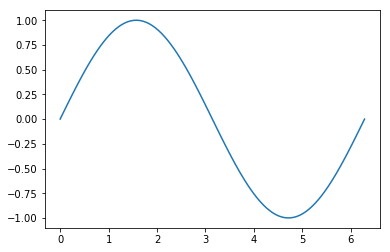

In [19]:
plt.plot(t,U[:,0])

### Example

Let's write a function called `vibration` which takes input parameters $m$, $c$, $k$, $g$, $y_0$, $a$ and $b$ and plots the solution of the equation

$$
my'' + cy' + ky = g(t)
$$

over the interval $[a,b]$ with intial considitions given by the vector $y_0$. This equation describes the [vibration](https://en.wikipedia.org/wiki/Vibration) of a mass $m$ constrained by a spring $k$ and damper $c$.

In [20]:
def vibration(m,c,k,g,y0,a,b):
    '''Plot the solution of the vibration equation my'' + cy' + ky = g(t).'''
    
    # Introduce variable u_1 = y and u_2 = y'
    def f(u,t):
        return [ u[1] , (1/m)*(g(t) - k*u[0] - c*u[1]) ]
    
    u0 = y0
    t = np.linspace(a,b,100*int((b - a)))
    U = spi.odeint(f,u0,t)
    plt.plot(t,U[:,0])

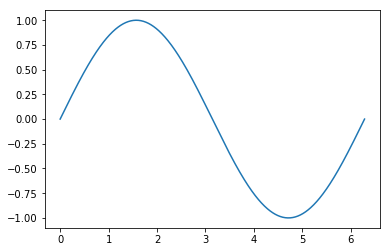

In [21]:
vibration(1,0,1,lambda x : 0,[0,1],0,2*np.pi)

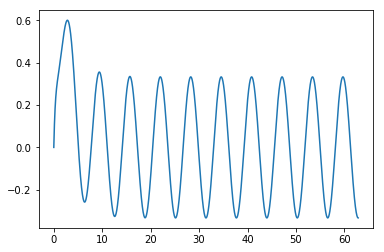

In [22]:
vibration(1,3,1,lambda x : np.sin(x),[0,1],0,20*np.pi)

Notice that we are using [lambda functions](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions). This is a feature of Python which allows us to define Python functions inline.

One last example, let's consider a system with $m=2$, $c=0$ and $k=3$. Then the natural frequency of the system is $\omega_n = \sqrt{3/2}$ and so we observe resonance when the forcing function of the system has the natural frequency.

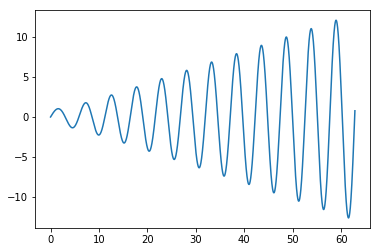

In [23]:
vibration(2,0,3,lambda x : np.sin(np.sqrt(3/2)*x),[0,1],0,20*np.pi)

## 3. Exercises

**Exercise.** Plot the solutions $y_1(t)$, $y_2(t)$ of the linear system

$$
\begin{align}
y_1' &= y_1 - y_2 \\
y_2' &= y_1 + y_2
\end{align}
$$

given initial conditions $y_1(0) = y_2(0) = 1$ for $t \in [0,5]$.

**Exercise.** Plot the solutions $(y_1(t)$, $y_2(t))$ as a trajectory in the $y_1$-$y_2$-plane for the nonlinear system

$$
\begin{align}
y_1' &= y_1^2 - y_2 \\
y_2' &= y_1y_2 - y_1
\end{align}
$$

given initial conditions $y_1(0) = 2$, $y_2(0) = 3$ for $t \in [0,10]$.

**Exercise.** Plot the solution $y(t)$ of the second order nonlinear equation

$$
y'' - t(y')^2 + y^2 = 0
$$

with $y(0) = 0$, $y'(0) = 1$ for $t \in [0,30]$.